In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Данные константы
k = 0.011
c = 1.6
alpha = 0.5
l = 0.5 # длина цилиндра
radius = 4 # радиус
beta = 0.008
t = 180 # время наблюдения

In [3]:
# Задаем число отсчетов и шаги
num_m = 100
num_i = 100
tau = t/num_m # шаг по времени
r_arr = np.linspace(0,l,num_i) # массив точек распредленных [0,R]
h = radius/num_i # шаг по координате r
w = np.zeros((num_i, num_m))

In [4]:
import scipy.optimize
def bessel(x):
    return scipy.special.jv(0,x)
res = scipy.optimize.root(bessel, 2.3) # нахождение нуля функции в окрестности точки x = 2.3
mu1 = float(res.get('x'))  # первый нуль функции бесселя нулевого порядка

In [5]:
def intensive(i): # интенсивность в i-ой точке
    assert i<num_i, "функция intensive(r) определена только для r<radius"
    return bessel(mu1*i*h/radius)

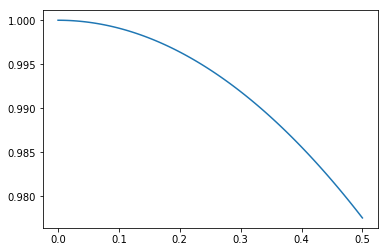

In [6]:
plt.plot(r_arr,bessel(mu1*r_arr/radius)) #нарисуем интенсивность
plt.show()

In [7]:
a_const = c/t+4*k/h**2+2*alpha/l
b_const = -4*k/h**2
def c_const(i):
    return -k/h**2 + k/(2*h*i*h)
d_const = c/t + 2*k/h**2 + 2*alpha/l
def e_const(i):
    return -k/h**2 - k/(2*h*i*h)
f_const = -2*k/h**2
g_const = c/t + 2*k/h**2 + 2*alpha/l
h_const = c/t
def q_const(i):
    return beta/l*intensive(i)

In [8]:
P = np.zeros((num_i, num_i))
P[0,0] = a_const
P[0,1] = b_const
for i in range(1,num_i-1):  # по всем индексам кроме нулевого и последнего
    P[i,i-1] = c_const(i)
    P[i,i] = d_const
    P[i,i+1] = e_const(i)
P[-1,-2] = f_const
P[-1,-1] = g_const

In [9]:
P

array([[ 29.50888889, -27.5       ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ -3.4375    ,  15.75888889, -10.3125    , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  -5.15625   ,  15.75888889, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  15.75888889,
         -6.91043814,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,  -6.83992347,
         15.75888889,  -6.91007653],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        -13.75      ,  15.75888889]])

In [10]:
# краевое условие
w[:,0] = 0 # при t = 0

In [11]:
q = np.zeros((1,num_i))
for i in range(num_i):
    q[0:i] = beta/l*intensive(i)
q.T.shape

(100, 1)

In [12]:
for m in range(0,num_m-1): # идем послойно, по времени
    right_column = (c/t*w[:,m]+q).T
    w[:,m+1] = np.linalg.solve(P,right_column)[:,0]

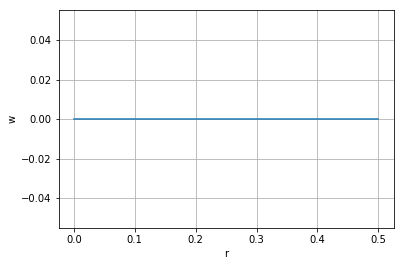

In [13]:
#plt.ylim((-1.1, 0.5))
plt.plot(r_arr, w[:,0])
plt.ylabel('w')
plt.xlabel('r')
plt.grid(True) 
plt.show()

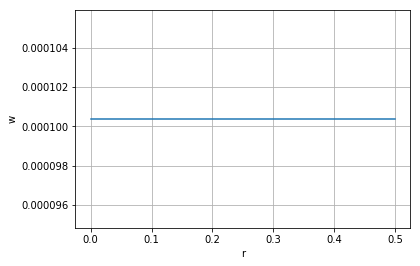

In [14]:
#plt.ylim((-1.1, 0.5))
plt.plot(r_arr, w[:,4])
plt.ylabel('w')
plt.xlabel('r')
plt.grid(True) 
plt.show()

In [15]:
w[:,99]

array([0.00010037, 0.00010037, 0.00010037, 0.00010037, 0.00010037,
       0.00010037, 0.00010037, 0.00010037, 0.00010037, 0.00010037,
       0.00010037, 0.00010037, 0.00010037, 0.00010037, 0.00010037,
       0.00010037, 0.00010037, 0.00010037, 0.00010037, 0.00010037,
       0.00010037, 0.00010037, 0.00010037, 0.00010037, 0.00010037,
       0.00010037, 0.00010037, 0.00010037, 0.00010037, 0.00010037,
       0.00010037, 0.00010037, 0.00010037, 0.00010037, 0.00010037,
       0.00010037, 0.00010037, 0.00010037, 0.00010037, 0.00010037,
       0.00010037, 0.00010037, 0.00010037, 0.00010037, 0.00010037,
       0.00010037, 0.00010037, 0.00010037, 0.00010037, 0.00010037,
       0.00010037, 0.00010037, 0.00010037, 0.00010037, 0.00010037,
       0.00010037, 0.00010037, 0.00010037, 0.00010037, 0.00010037,
       0.00010037, 0.00010037, 0.00010037, 0.00010037, 0.00010037,
       0.00010037, 0.00010037, 0.00010037, 0.00010037, 0.00010037,
       0.00010037, 0.00010037, 0.00010037, 0.00010037, 0.00010

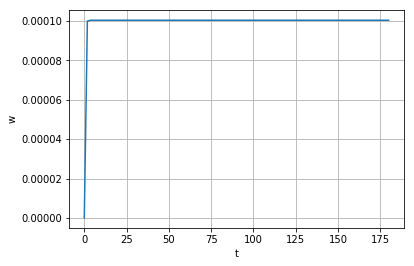

In [16]:
t_arr = np.linspace(0,t, num_m)
#plt.ylim((-1.1, 0.5))
plt.plot(t_arr, w[0,:])
plt.ylabel('w')
plt.xlabel('t')
plt.grid(True) 
plt.show()

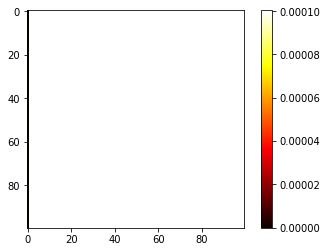

In [17]:
import matplotlib.cm as cmap
plt.imshow(w, cmap=cmap.hot)
plt.colorbar()
plt.show()